# Machine Leanring Assignment 3: Tweet Sentiment Classifcation

In [4]:
# Imports
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import ast
from scipy.sparse import csr_matrix
from sklearn.feature_extraction import DictVectorizer

from collections import Counter
from random import random

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# TRAINING PHASE 1

## Read Train Data

In [5]:
def convertToDictionary(data):
    i = 0
    for tweet in data["tweet"]:
        tweet_list = ast.literal_eval(tweet)
        tweet_kv = [(str(tup[0]), tup[1]) for tup in tweet_list]
        tweet_dict = dict(tweet_kv)
        data.at[i, "tweet"] = tweet_dict
        i += 1
        
    return data

def convertToList(data):
    i = 0
    for tweet in data["tweet"]:
        tweet_list = ast.literal_eval(tweet)
        data.at[i, "tweet"] = tweet_list
        i += 1
        
    return data

In [7]:
# LOAD TRAIN DATA
# 1. TFIDF
train_data_f = pd.read_csv("train_tfidf.csv")

# Convert each tweet into a dictionary for processing
train_data_f = convertToDictionary(train_data_f)
y_train_f = train_data_f["sentiment"]

# 2. GloVe
train_data_g = pd.read_csv("train_glove.csv")
train_data_g = convertToList(train_data_g)
y_train_g = train_data_g["sentiment"]

# 3. Count
train_data_c = pd.read_csv("train_count.csv")
train_data_c = convertToDictionary(train_data_c)
y_train_c = train_data_c["sentiment"]



## Visualize Data

The prior probability of positive is 0.39212
The prior probability of negative is 0.40735
The prior probability of neutral is 0.20052


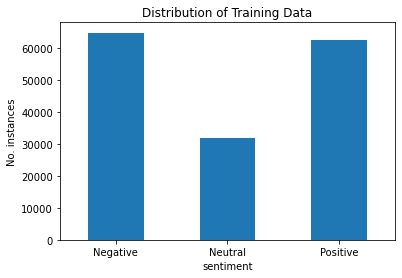

In [8]:
# Plot distribution for training dataset.
ax = train_data_f.groupby('sentiment').count()["tweet"].plot(kind='bar', title='Distribution of Training Data',
                                                             ylabel='No. instances', legend=False)
ax.set_xticklabels(["Negative","Neutral","Positive"], rotation=0)

prior_pos_t = Counter(y_train_f)['pos'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
prior_neg_t = Counter(y_train_f)['neg'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
prior_neu_t = Counter(y_train_f)['neu'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
print("The prior probability of positive is", round(prior_pos_t,5))
print("The prior probability of negative is", round(prior_neg_t,5))
print("The prior probability of neutral is", round(prior_neu_t,5))

## Process Training Input

In [9]:
# Process Data
v = DictVectorizer()

X_train_f = v.fit_transform(train_data_f["tweet"])

X_train_g = train_data_g["tweet"].to_list()

X_train_c = v.fit_transform(train_data_c["tweet"])

## Train Models
Models were trained on each of the three given feature representations to determine best model feature pairing

### 1 . TFIDF

#### Logistic Regression

In [10]:
lr_f = LogisticRegression(multi_class = 'multinomial', max_iter = 400).fit(X_train_f, y_train_f)

#### Multinomial Naive Bayes

In [11]:
mnb_f = MultinomialNB().fit(X_train_f,y_train_f)

#### Multi-Layer Perceptron

In [12]:
mlp_f = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,)).fit(X_train_f, y_train_f)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Linear SVC

In [13]:
lsvc_f = LinearSVC(dual=False).fit(X_train_f, y_train_f)

### 2. GloVe

#### Logistic Regression

In [14]:
lr_g = LogisticRegression(multi_class = 'multinomial', max_iter = 400).fit(X_train_g, y_train_g)

#### Multi-Layer Perceptron

In [15]:
mlp_g = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(30,10,5,3), random_state=1).fit(X_train_g, y_train_g)

#### Naive Bayes

In [16]:
mnb_g = make_pipeline(MinMaxScaler([0,1]),MultinomialNB()).fit(X_train_g,y_train_g)

In [17]:
gnb_g = GaussianNB(priors = [0.4,0.2,0.4]).fit(X_train_g,y_train_g)

#### Linear SVC

In [18]:
lsvc_g = LinearSVC(dual=False).fit(X_train_g, y_train_g)

### 3. Count

#### Logistic Regression

In [19]:
lr_c = LogisticRegression(multi_class = 'multinomial', max_iter = 400).fit(X_train_c, y_train_c)

#### Multinomial Naive Bayes

In [20]:
mnb_c = MultinomialNB().fit(X_train_c,y_train_c)

#### Multi-Layer Perceptron

In [21]:
mlp_c = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,)).fit(X_train_c, y_train_c)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Linear SVC

In [22]:
lsvc_c = LinearSVC(dual=False).fit(X_train_c, y_train_c)

 # DEVELOPMENT PHASE 1

## Read Dev Data

In [23]:
# LOAD DEV DATA
# ********************** CHANGE TO SAME FOLDER ********************************************
# 1. TFIDF
dev_data_f = pd.read_csv("dev_tfidf.csv")
dev_data_f = convertToDictionary(dev_data_f)
y_dev_f = dev_data_f["sentiment"]

# 2. GloVe
dev_data_g = pd.read_csv("dev_glove.csv")
dev_data_g = convertToList(dev_data_g)
y_dev_g = dev_data_g["sentiment"]

# 3. Count
dev_data_c = pd.read_csv("dev_count.csv")
dev_data_c = convertToDictionary(dev_data_c)
y_dev_c = dev_data_c["sentiment"]

The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567


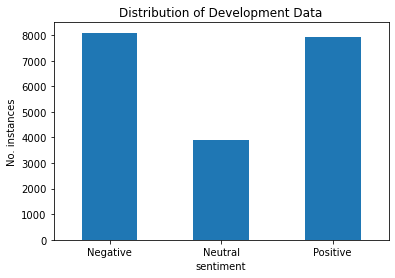

In [24]:
# Plot distribution for training dataset.
ax_dev = dev_data_f.groupby('sentiment').count()['tweet'].plot(kind='bar', title='Distribution of Development Data',
                                                               ylabel='No. instances', legend=False)
ax_dev.set_xticklabels(["Negative","Neutral","Positive"], rotation=0)

# Determine class distirbutions
prior_pos = Counter(y_dev_f)['pos'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])
prior_neg = Counter(y_dev_f)['neg'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])
prior_neu = Counter(y_dev_f)['neu'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])

print("The prior probability of positive is", round(prior_pos,5))
print("The prior probability of negative is", round(prior_neg,5))
print("The prior probability of neutral is", round(prior_neu,5))

## Process Dev Input

In [25]:
# Process Data
X_dev_f = v.transform(dev_data_f["tweet"])

X_dev_g = dev_data_g["tweet"].to_list()

X_dev_c = v.transform(dev_data_c["tweet"])

## Predictions - DEV dataset

In [28]:
# MODELS - DEV
# tfidf
lr_f_pred = lr_f.predict(X_dev_f)

mnb_f_pred = mnb_f.predict(X_dev_f)

mlp_f_pred = mlp_f.predict(X_dev_f)

lsvc_f_pred = lsvc_f.predict(X_dev_f)

In [29]:
# glove
lr_g_pred = lr_g.predict(X_dev_g)

mnb_g_pred = mnb_g.predict(X_dev_g)
gnb_g_pred = gnb_g.predict(X_dev_g)

mlp_g_pred = mlp_g.predict(X_dev_g)

lsvc_g_pred = lsvc_g.predict(X_dev_g)

In [30]:
# count
lr_c_pred = lr_c.predict(X_dev_c)

mnb_c_pred = mnb_c.predict(X_dev_c)

mlp_c_pred = mlp_c.predict(X_dev_c)

lsvc_c_pred = lsvc_c.predict(X_dev_c)

## Evaluation - DEV dataset

In [31]:
print("Tfidf")
print("Logistic Regression Accuracy:\t" + str(lr_f.score(X_dev_f, y_dev_f)))
print("Naive Bayes Accuracy:\t" + str(mnb_f.score(X_dev_f, y_dev_f)))
print("Multi-Layer Perceptron:\t" + str(mlp_f.score(X_dev_f, y_dev_f)))
print("Linear SVC Accuracy:\t" + str(lsvc_f.score(X_dev_f, y_dev_f)))



print("GloVe")
print("Logistic Regression Accuracy:\t" + str(lr_g.score(X_dev_g, y_dev_g)))
print("Naive Bayes Accuracy:\t" + str(mnb_g.score(X_dev_g, y_dev_g)))
print("G Naive Bayes Accuracy:\t" + str(gnb_g.score(X_dev_g, y_dev_g)))
print("Multi-Layer Perceptron:\t" + str(mlp_g.score(X_dev_g, y_dev_g)))
print("Linear SVC Accuracy:\t" + str(lsvc_g.score(X_dev_g, y_dev_g)))

print("Count")
print("Logistic Regression Accuracy:\t" + str(lr_c.score(X_dev_c, y_dev_c)))
print("Naive Bayes Accuracy:\t" + str(mnb_c.score(X_dev_c, y_dev_c)))
print("Multi-Layer Perceptron:\t" + str(mlp_c.score(X_dev_c, y_dev_c)))
print("Linear SVC Accuracy:\t" + str(lsvc_c.score(X_dev_c, y_dev_c)))

Tfidf
Logistic Regression Accuracy:	0.7416859238420577
Naive Bayes Accuracy:	0.7256103687330453
Multi-Layer Perceptron:	0.7197829800060284
Linear SVC Accuracy:	0.7389229378076961
GloVe
Logistic Regression Accuracy:	0.6778358283934492
Naive Bayes Accuracy:	0.4401687933286446
G Naive Bayes Accuracy:	0.4493620014066111
Multi-Layer Perceptron:	0.708630563649151
Linear SVC Accuracy:	0.6783884256003215
Count
Logistic Regression Accuracy:	0.7408319099768914
Naive Bayes Accuracy:	0.7307846880337586
Multi-Layer Perceptron:	0.7165678689842259
Linear SVC Accuracy:	0.7406812016477444


In [32]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mnb_f, X=X_train_f, y=y_train_f,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

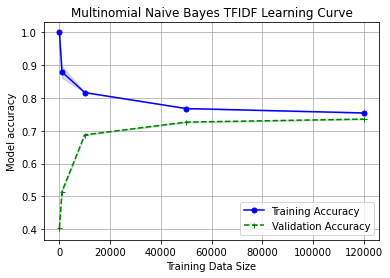

In [33]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Multinomial Naive Bayes TFIDF Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [34]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_f, X=X_train_f, y=y_train_f,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'pos'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details:

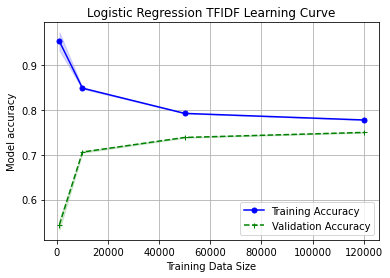

In [35]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Logistic Regression TFIDF Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [36]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lsvc_f, X=X_train_f, y=y_train_f,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 935, in _fit_liblinear
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'pos'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_sel

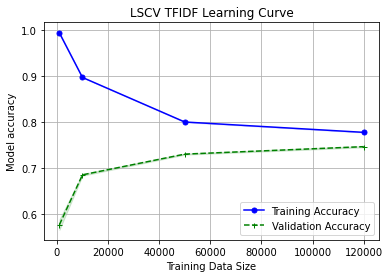

In [37]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('LSCV TFIDF Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [38]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp_f, X=X_train_f, y=y_train_f,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multi

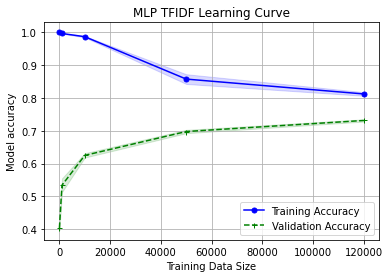

In [39]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('MLP TFIDF Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Overfitting - high varience, modernate bias = Bad model. Increase training data (we can't do this) and reduce features -> use GloVe feature set. Reduce model complexity can also help. Model is already simple with a single hidden layer

In [40]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp_g, X=X_train_g, y=y_train_g,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multi

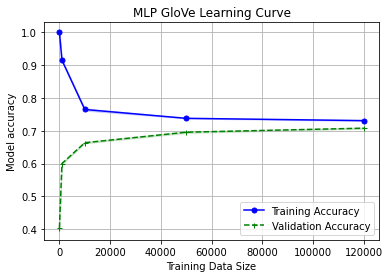

In [41]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('MLP GloVe Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [42]:
train_sizes, train_scores, test_scores = learning_curve(estimator=gnb_g, X=X_train_g, y=y_train_g,
                                                       cv=5, train_sizes=[10,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 209, in fit
    return self._partial_fit(X, y, np.unique(y), _refit=True,
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 390, in _partial_fit
    raise ValueError('Number of priors must match number of'
ValueError: Number of priors must match number of classes.

  warnings.warn("Estimator fit failed. The score on this train-test"


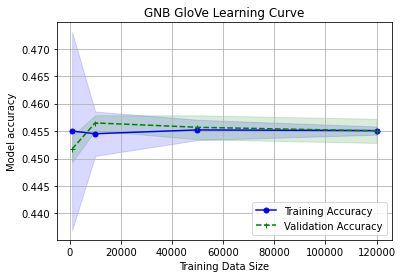

In [43]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('GNB GloVe Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [44]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_g, X=X_train_g, y=y_train_g,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'pos'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

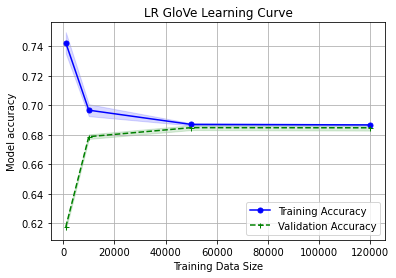

In [45]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('LR GloVe Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [46]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lsvc_g, X=X_train_g, y=y_train_g,
                                                       cv=5, train_sizes=[1,1000,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\dcole\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 935, in _fit_liblinear
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'pos'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\model_sel

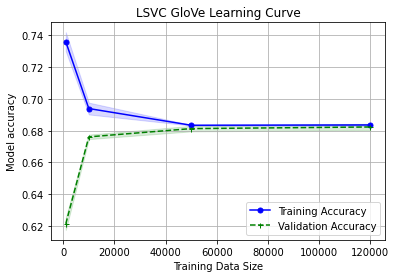

In [47]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('LSVC GloVe Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Stable model- low variance, moderate bias. Optimise bias by increasing complexity of model

In [48]:
def confusionMatrix(y_dev, y_pred, title):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_dev, y_pred)
    print(cf_matrix)
    categories = ['Negative','Neutral','Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    group_percentages = np.asarray(group_percentages).reshape(3,3)
    sns.heatmap(cf_matrix, annot = group_percentages, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title (title, fontdict = {'size':18}, pad = 20)
    

              precision    recall  f1-score   support

         neg       0.74      0.72      0.73      8095
         neu       0.82      0.85      0.84      3895
         pos       0.71      0.71      0.71      7916

    accuracy                           0.74     19906
   macro avg       0.75      0.76      0.76     19906
weighted avg       0.74      0.74      0.74     19906

[[5854  281 1960]
 [ 212 3324  359]
 [1892  438 5586]]
None


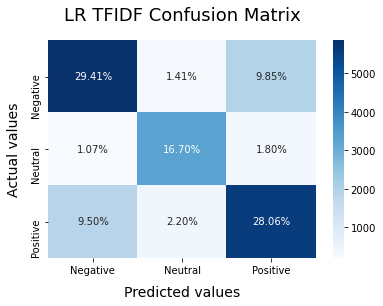

In [49]:
# Print the evaluation metrics for the tfidf dataset.
print(classification_report(y_dev_f, lr_f_pred))
print(confusionMatrix(y_dev_f, lr_f_pred, "LR TFIDF Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.70      0.73      0.72      8095
         neu       0.87      0.78      0.82      3895
         pos       0.69      0.69      0.69      7916

    accuracy                           0.73     19906
   macro avg       0.75      0.74      0.74     19906
weighted avg       0.73      0.73      0.73     19906

[[5940  191 1964]
 [ 338 3048  509]
 [2187  273 5456]]
None


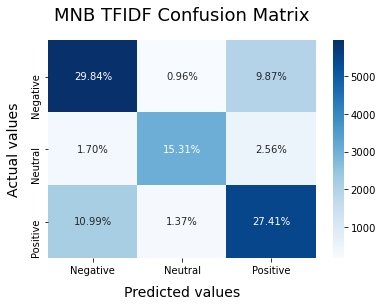

In [50]:
print(classification_report(y_dev_f, mnb_f_pred))
print(confusionMatrix(y_dev_f, mnb_f_pred, "MNB TFIDF Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.71      0.70      0.70      8095
         neu       0.82      0.83      0.83      3895
         pos       0.68      0.69      0.68      7916

    accuracy                           0.72     19906
   macro avg       0.74      0.74      0.74     19906
weighted avg       0.72      0.72      0.72     19906

[[5643  281 2171]
 [ 240 3242  413]
 [2051  422 5443]]
None


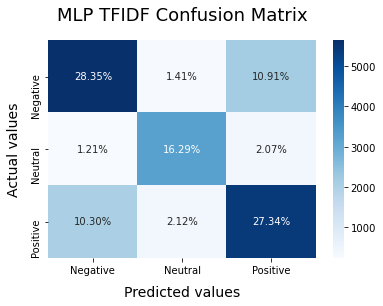

In [51]:
print(classification_report(y_dev_f, mlp_f_pred))
print(confusionMatrix(y_dev_f, mlp_f_pred, "MLP TFIDF Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.74      0.72      0.73      8095
         neu       0.81      0.85      0.83      3895
         pos       0.71      0.70      0.70      7916

    accuracy                           0.74     19906
   macro avg       0.75      0.76      0.75     19906
weighted avg       0.74      0.74      0.74     19906

[[5832  307 1956]
 [ 212 3323  360]
 [1883  479 5554]]
None


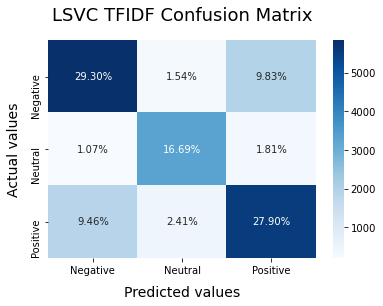

In [52]:
print(classification_report(y_dev_f, lsvc_f_pred))
print(confusionMatrix(y_dev_f, lsvc_f_pred, "LSVC TFIDF Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.74      0.72      0.73      8095
         neu       0.82      0.86      0.84      3895
         pos       0.70      0.71      0.71      7916

    accuracy                           0.74     19906
   macro avg       0.75      0.76      0.76     19906
weighted avg       0.74      0.74      0.74     19906

[[5810  296 1989]
 [ 196 3336  363]
 [1854  461 5601]]
None


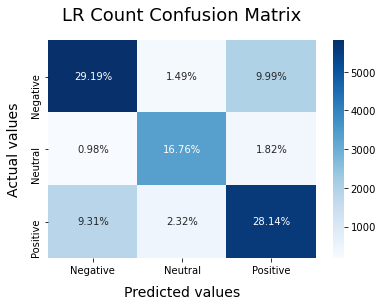

In [53]:
# Print the evaluation metrics for the count dataset.
print(classification_report(y_dev_c, lr_c_pred))
print(confusionMatrix(y_dev_c, lr_c_pred, "LR Count Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.71      0.73      0.72      8095
         neu       0.83      0.81      0.82      3895
         pos       0.70      0.69      0.69      7916

    accuracy                           0.73     19906
   macro avg       0.75      0.74      0.75     19906
weighted avg       0.73      0.73      0.73     19906

[[5913  266 1916]
 [ 292 3169  434]
 [2083  368 5465]]
None


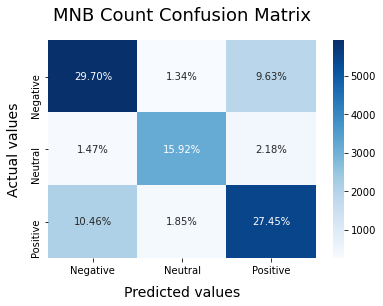

In [54]:
print(classification_report(y_dev_c, mnb_c_pred))
print(confusionMatrix(y_dev_c, mnb_c_pred, "MNB Count Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.70      0.72      0.71      8095
         neu       0.82      0.82      0.82      3895
         pos       0.68      0.66      0.67      7916

    accuracy                           0.72     19906
   macro avg       0.73      0.73      0.73     19906
weighted avg       0.72      0.72      0.72     19906

[[5851  260 1984]
 [ 253 3203  439]
 [2250  456 5210]]
None


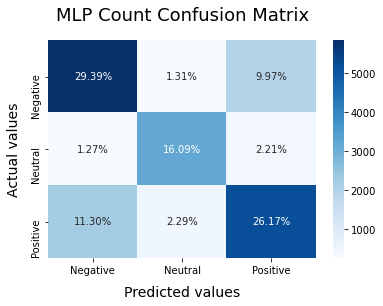

In [55]:
print(classification_report(y_dev_c, mlp_c_pred))
print(confusionMatrix(y_dev_c, mlp_c_pred, "MLP Count Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.74      0.72      0.73      8095
         neu       0.82      0.85      0.83      3895
         pos       0.70      0.71      0.71      7916

    accuracy                           0.74     19906
   macro avg       0.75      0.76      0.76     19906
weighted avg       0.74      0.74      0.74     19906

[[5824  276 1995]
 [ 214 3299  382]
 [1851  444 5621]]
None


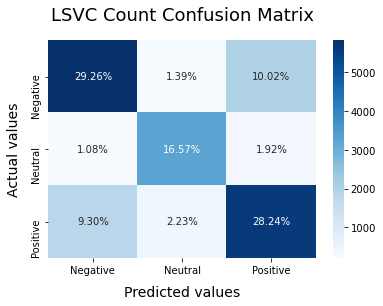

In [56]:
print(classification_report(y_dev_c, lsvc_c_pred))
print(confusionMatrix(y_dev_c, lsvc_c_pred, "LSVC Count Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.68      0.68      0.68      8095
         neu       0.75      0.81      0.78      3895
         pos       0.64      0.61      0.62      7916

    accuracy                           0.68     19906
   macro avg       0.69      0.70      0.69     19906
weighted avg       0.68      0.68      0.68     19906

[[5496  329 2270]
 [ 239 3139  517]
 [2365  693 4858]]
None


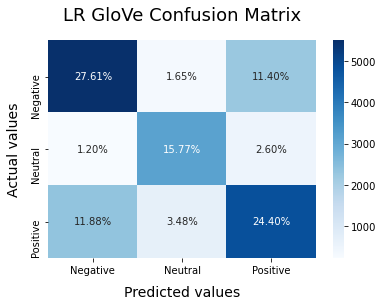

In [57]:
# # Print the evaluation metrics for the glove dataset.
print(classification_report(y_dev_g, lr_g_pred))
print(confusionMatrix(y_dev_g, lr_g_pred, "LR GloVe Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.55      0.45      0.50      8095
         neu       0.37      0.86      0.51      3895
         pos       0.47      0.24      0.32      7916

    accuracy                           0.45     19906
   macro avg       0.46      0.52      0.44     19906
weighted avg       0.48      0.45      0.43     19906

[[3667 2639 1789]
 [ 195 3365  335]
 [2803 3200 1913]]
None


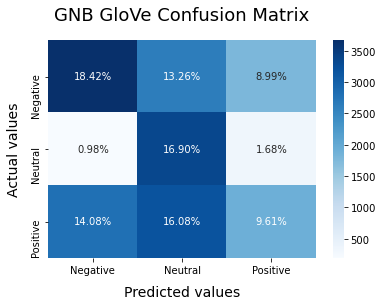

In [58]:
print(classification_report(y_dev_g, gnb_g_pred))
print(confusionMatrix(y_dev_g, gnb_g_pred, "GNB GloVe Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.69      0.72      0.71      8095
         neu       0.81      0.86      0.83      3895
         pos       0.68      0.62      0.65      7916

    accuracy                           0.71     19906
   macro avg       0.72      0.73      0.73     19906
weighted avg       0.71      0.71      0.71     19906

[[5850  260 1985]
 [ 192 3331  372]
 [2447  544 4925]]
None


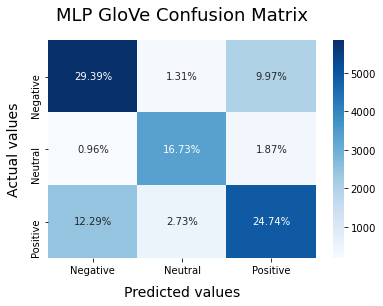

In [59]:
print(classification_report(y_dev_g, mlp_g_pred))
print(confusionMatrix(y_dev_g, mlp_g_pred, "MLP GloVe Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.67      0.71      0.69      8095
         neu       0.74      0.81      0.77      3895
         pos       0.65      0.58      0.62      7916

    accuracy                           0.68     19906
   macro avg       0.69      0.70      0.69     19906
weighted avg       0.68      0.68      0.68     19906

[[5723  385 1987]
 [ 274 3159  462]
 [2548  746 4622]]
None


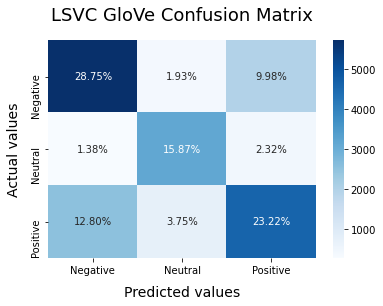

In [60]:
print(classification_report(y_dev_g, lsvc_g_pred))
print(confusionMatrix(y_dev_g, lsvc_g_pred, "LSVC GloVe Confusion Matrix"))

## Baseline Evaluation
Check each model performs better than the naive baseline model. One-R in this case

In [61]:
# One-R implementation
import random

def weight_random(y_dev):
    error = 0    

    correct = 0
    incorrect = 0
    for label in y_dev:
        prediction = random.choice(y_dev)
        if(prediction == label):
            correct += 1
        else:
            incorrect += 1

    error = incorrect / len(y_dev)
 
    return error, correct, incorrect

count_pos = Counter(y_dev_f)['pos'] 
count_neg = Counter(y_dev_f)['neg'] 
count_neu = Counter(y_dev_f)['neu']

In [62]:
error, correct, incorrect = weight_random(y_dev_f)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7259 correct predicitons,  12647 incorrect predictions
The weighted random baseline's error is: 0.6353360796


In [63]:
error, correct, incorrect = weight_random(y_dev_g)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7280 correct predicitons,  12626 incorrect predictions
The weighted random baseline's error is: 0.6342811213


In [64]:
error, correct, incorrect = weight_random(y_dev_c)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7214 correct predicitons,  12692 incorrect predictions
The weighted random baseline's error is: 0.6375967045


In [65]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_dev_f, y_dev_f)
dummy_clf.score(X_dev_f, y_dev_f)

0.35697779563950566

# Model Tuning


## Feature Selection
Select 1000 best TFIDF features 

In [66]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
skb = SelectKBest = SelectKBest(chi2, k=1000).fit(X_train_f, y_train_f)

X_train_f_new = skb.transform(X_train_f)
X_dev_f_new = skb.transform(X_dev_f)

In [67]:
lr_f_tune = LogisticRegression(multi_class = 'multinomial', max_iter = 400).fit(X_train_f_new, y_train_f)

In [68]:
mnb_f_tune = MultinomialNB().fit(X_train_f_new,y_train_f)

In [69]:
lsvc_f_tune = LinearSVC(dual=False).fit(X_train_f_new, y_train_f)

In [71]:
lr_f_tune_pred = lr_f_tune.predict(X_dev_f_new)
mnb_f_tune_pred = mnb_f_tune.predict(X_dev_f_new)
lscv_f_tune_pred = lsvc_f_tune.predict(X_dev_f_new)

0.7105897719280619
              precision    recall  f1-score   support

         neg       0.73      0.67      0.70      8095
         neu       0.71      0.86      0.78      3895
         pos       0.69      0.67      0.68      7916

    accuracy                           0.71     19906
   macro avg       0.71      0.74      0.72     19906
weighted avg       0.71      0.71      0.71     19906

[[5458  615 2022]
 [ 201 3346  348]
 [1814  761 5341]]
None


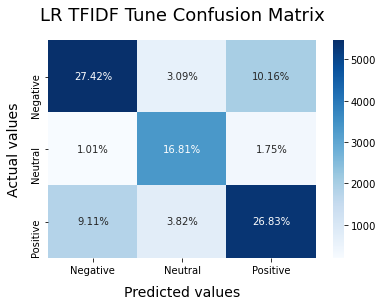

In [72]:
print(lr_f_tune.score(X_dev_f_new, y_dev_f))
print(classification_report(y_dev_f, lr_f_tune_pred))
print(confusionMatrix(y_dev_f, lr_f_tune_pred, "LR TFIDF Tune Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.65      0.75      0.69      8095
         neu       0.87      0.67      0.75      3895
         pos       0.69      0.65      0.67      7916

    accuracy                           0.69     19906
   macro avg       0.73      0.69      0.71     19906
weighted avg       0.71      0.69      0.70     19906

[[6069  172 1854]
 [ 794 2598  503]
 [2544  222 5150]]
None


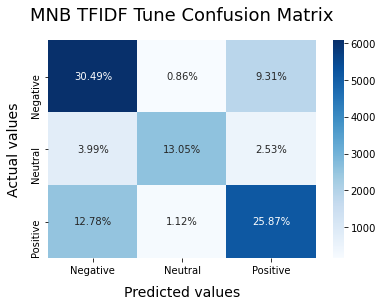

In [73]:
print(classification_report(y_dev_f, mnb_f_tune_pred))
print(confusionMatrix(y_dev_f, mnb_f_tune_pred, "MNB TFIDF Tune Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.73      0.67      0.70      8095
         neu       0.81      0.76      0.78      3895
         pos       0.65      0.72      0.68      7916

    accuracy                           0.71     19906
   macro avg       0.73      0.72      0.72     19906
weighted avg       0.71      0.71      0.71     19906

[[5428  292 2375]
 [ 187 2951  757]
 [1778  414 5724]]
None


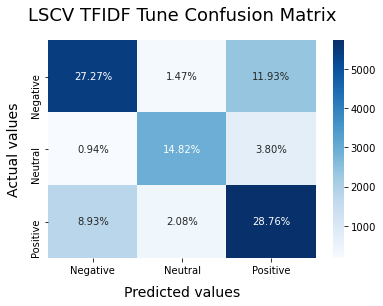

In [74]:
print(classification_report(y_dev_f, lscv_f_tune_pred))
print(confusionMatrix(y_dev_f, lscv_f_tune_pred, "LSCV TFIDF Tune Confusion Matrix"))

### MLP Learning Curve Tuning

In [75]:
# Tuned mlp_f
mlp_f_tune = MLPClassifier(hidden_layer_sizes=(2,)).fit(X_train_f, y_train_f)

In [76]:
# Tuned mlp_c
mlp_c_tune = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(2,)).fit(X_train_f, y_train_f)

In [77]:
mlp_f_tune_pred = mlp_f_tune.predict(X_dev_f)
mlp_c_tune_pred = mlp_c_tune.predict(X_dev_c)

In [78]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp_f_tune, X=X_train_f, y=y_train_f,
                                                       cv=5, train_sizes=[1,10000,50000,120000],
                                                     n_jobs=1)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dcole\anaconda3\lib\site-packages\sklearn\neural_network\_multi

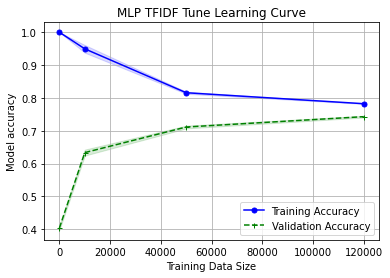

In [79]:
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('MLP TFIDF Tune Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

         neg       0.73      0.72      0.73      8095
         neu       0.81      0.85      0.83      3895
         pos       0.70      0.70      0.70      7916

    accuracy                           0.74     19906
   macro avg       0.75      0.76      0.75     19906
weighted avg       0.74      0.74      0.74     19906

[[5829  312 1954]
 [ 205 3325  365]
 [1917  485 5514]]
None


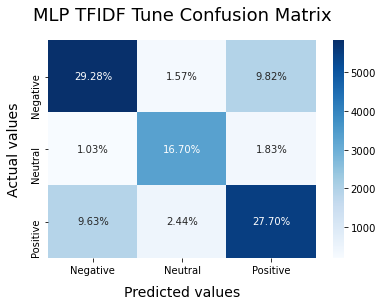

In [80]:
print(classification_report(y_dev_f, mlp_f_tune_pred))
print(confusionMatrix(y_dev_f, mlp_f_tune_pred, "MLP TFIDF Tune Confusion Matrix"))

              precision    recall  f1-score   support

         neg       0.72      0.58      0.64      8095
         neu       0.86      0.79      0.83      3895
         pos       0.62      0.78      0.69      7916

    accuracy                           0.70     19906
   macro avg       0.74      0.71      0.72     19906
weighted avg       0.71      0.70      0.70     19906

[[4662  188 3245]
 [ 327 3088  480]
 [1464  307 6145]]
None


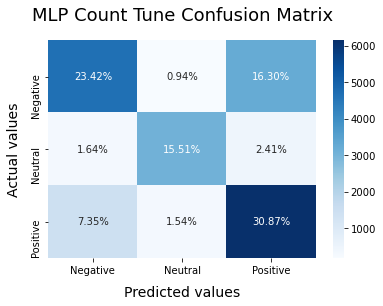

In [81]:
print(classification_report(y_dev_c, mlp_c_tune_pred))
print(confusionMatrix(y_dev_f, mlp_c_tune_pred, "MLP Count Tune Confusion Matrix"))

# TESTING PHASE 

## Read Test Data

In [82]:
# LOAD DEV DATA
# 1. TFIDF
test_data_f = pd.read_csv("test_tfidf.csv")
test_data_f = convertToDictionary(test_data_f)

# 1. Count
test_data_c = pd.read_csv("test_count.csv")
test_data_c = convertToDictionary(test_data_c)

## Process Test Input
Prepare the features which performed the best during dev evaluation 

In [83]:
# Process Data
X_test_f = v.transform(test_data_f["tweet"])

X_test_c = v.transform(test_data_c["tweet"])

## Test Model
Test selected model against the test instances

In [84]:
# MODELS - TEST
lr_f_pred_test = lr_f.predict(X_test_f)

#### Format for Kaggle

In [85]:
# tweet_ids = test_data_f["tweet_id"].tolist()
# predictions = np.vstack((tweet_ids, lr_f_pred))
# print(predictions)

test_data_f["sentiment"] = lr_f_pred_test

test_data_f = test_data_f.drop('tweet', 1)

In [ ]:
test_data_f.to_csv("predictionsLRtfidf.csv", sep=',', encoding='utf-8', index=False)